In [131]:
# import required packages-

import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.patches
from mplsoccer import VerticalPitch

In [78]:
# Set input paramaters such as titles, colours and squad file.abs

team_name = "Aberdeen"

season_start = 2025

squadfile = 'aberdeen.csv'

formation ='4231' # set formation to match formations available in mplsoccer library which can be found here: https://mplsoccer.readthedocs.io/en/latest/gallery/pitch_plots/plot_formations.html

colours = {
    "cl_background":"#000000",
    "cl_foreground":"#FFFFFF",
    "cl_secondary":"#999999",
    "cl_alt_1":"#6B0F1A",
    "cl_alt_2":"#3A86FF",
    "cl_alt_3":"#FFBE0B",
    "cl_alt_4":"#3EC300",
    "cl_alt_5":"#595959"}


title = team_name + "'s squad depth for season starting " + str(season_start) + " at current date: " + datetime.datetime.now().strftime("%d/%m/%Y")
subtitle = "Primary position expected for season starting 2025"

In [8]:
# read in and dispaly header of squad csv file

squad = pd.read_csv(squadfile)

squad.head()

,First Name,Last Name,Date of Birth,Position,Contract Expiry,Status
0,Dimitar,Mitov,22/01/1997,GK,2027,N
1,Ross,Doohan,29/03/1998,GK,2025,N
2,Tom,Ritchie,27/01/2003,GK,2025,N
3,Kristers,Tobers,13/12/2000,CB,2028,N
4,Alfie,Dorrington,20/04/2005,CB,2025,I


In [47]:
def calculate_age(born, season_start):
    #born_date = pd.to_datetime(born)
    start_date = datetime.datetime(season_start, 8,1)
    age = start_date.year - born_date.year - ((start_date.month, start_date.day) < (born_date.month, born_date.day))
    return age

In [54]:
# Calcualte age and contract length at start of season in question

squad["Date of Birth"] = pd.to_datetime(squad["Date of Birth"])
squad["Age"] = calculate_age(squad["Date of Birth"],season_start)
squad["Years Remaining"] = squad["Contract Expiry"] - season_start

In [73]:
# Setup pitch

pitch = VerticalPitch(
    pitch_type='opta',
    goal_type='box', 
    half=False, 
    pitch_color=colours["cl_background"], 
    line_color=colours["cl_foreground"],
    linewidth=.75
    )


AttributeError: FancyBboxPatch.set() got an unexpected keyword argument 'ha'

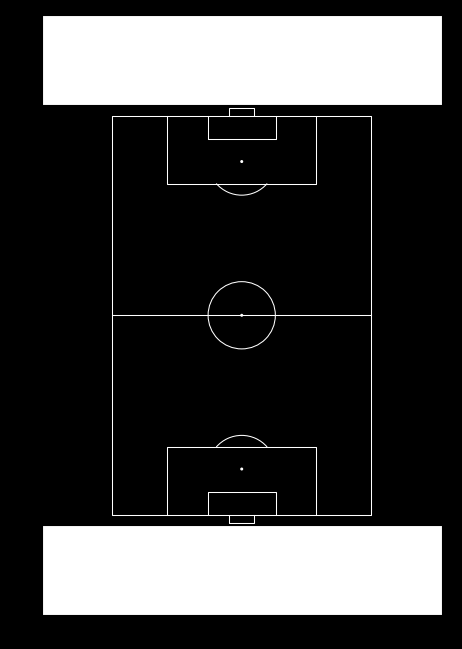

In [ ]:
fig = plt.figure(figsize=(4,6))
fig.patch.set_facecolor(colours["cl_background"])

# Add axis for header section, key and pitch
ax1 = fig.add_axes([0, 0.85, 1, .15])
ax2 = fig.add_axes([0, 0.15, 1, .7])
ax3 = fig.add_axes([0, 0, 1, .15])

pitch.draw(ax=ax2)

for row in pitch.formations_dataframe[pitch.formations_dataframe["formation"]==formation].iterrows():
    ax2.text(
            x=row[1]["y"],
            y=row[1]["x"],
            s=row[1]["name"],
            bbox=dict(boxstyle="round", fc=colours["cl_alt_1"], color=colours["cl_foreground"],
            ),
            ha='center'
        )

ax_scatter = pitch.formation(formation, kind='scatter', c=colours["cl_alt_3"], ax=ax2)